In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
import os
import re
import pandas as pd
def get_df(foldername):
    # Specify the folder containing the text files
    folder_path = 'D:/study/thesis/project/HBDM-main/ppi_results/test_results/'+foldername

    # Initialize lists to store extracted data
    all_data = []

    # Define the pattern to match the required data in the filenames
    filename_pattern = r'Dataset-(\w+)--RE-(\w+)--W-(\w+)--Epochs-(\d+)--D-(\d+)'

    # Define the pattern to match the required data within the files
    data_pattern = r"k=(\d+), leaf_size=(\d+)\s+F1: (\d+\.\d+)\s+AUC_PR: (\d+\.\d+)"

    # Loop through all text files in the folder
    for filename in os.listdir(folder_path):
        # break
        if filename.endswith('.txt'):
            # Extract 'RE', 'W', and 'Epochs' from the filename
            match = re.match(filename_pattern, filename)
            if match:
                data_value = match.group(1)
                re_value = match.group(2)
                w_value = match.group(3)
                epochs_value = int(match.group(4))
                d_value = int(match.group(5))
                
                with open(os.path.join(folder_path, filename), 'r') as file:
                    text = file.read()
                    matches = re.findall(data_pattern, text)
                    for match in matches:
                        k = int(match[0])
                        f1 = float(match[2])
                        auc = float(match[3])
                        
                        # Append the data to the list along with 'RE', 'W', and 'Epochs'
                        all_data.append((data_value, re_value, w_value, epochs_value,d_value,k, f1,auc))

    # Create a DataFrame from the extracted data
    columns = ['Dataset','RE', 'W', 'Epochs','D','k', 'F1', 'AUC_PR']
    df = pd.DataFrame(all_data, columns=columns)
    return df


In [7]:
df

,Dataset,RE,W,Epochs,D,k,F1,AUC_PR
0,ppi,True,True,15000,3,2,0.148647,0.067434
1,ppi,True,True,15000,3,3,0.127241,0.054448
2,ppi,True,True,15000,3,4,0.131297,0.059759
3,ppi,True,True,15000,3,5,0.124308,0.058711
4,ppi,True,True,15000,3,6,0.138812,0.063812
...,...,...,...,...,...,...,...,...
115,st_binary,True,True,15000,7,5,0.145900,0.072762
116,st_binary,True,True,15000,7,6,0.154615,0.080914
117,st_binary,True,True,15000,7,7,0.157227,0.080575
118,st_binary,True,True,15000,7,8,0.153990,0.075153


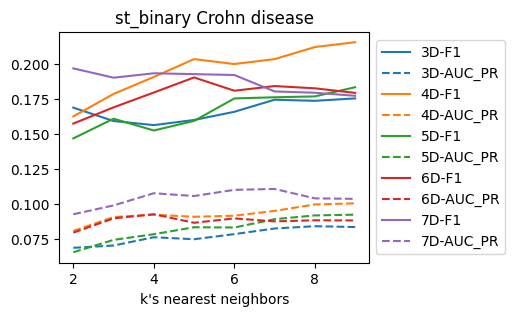

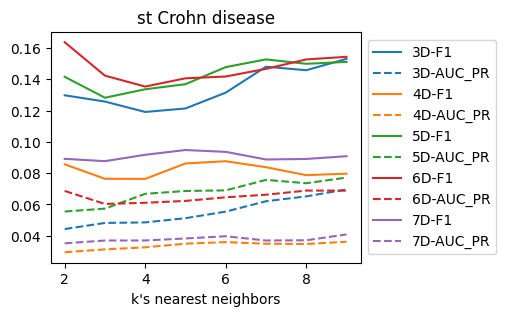

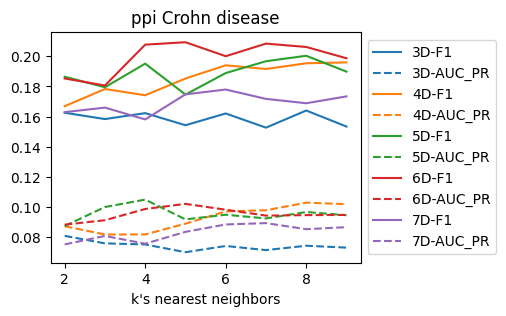

In [33]:
# Set a smaller figure size

# disease = ['Atherosclerosis', 'Cardiovascular_Diseases', 'Coronary_artery_disease', 'Coronary_heart_disease', 'Myocardial_Infarction']
disease =['Crohn disease']
for foldername in disease:
    # foldername = disease[4]
    df = get_df(foldername)
    for dataset_a in ['st_binary', 'st', 'ppi']:
        # Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
        x = [2, 3, 4, 5, 6, 7, 8, 9]
        colors = list(mcolors.TABLEAU_COLORS.values())
        d_list = [3, 4, 5, 6, 7]
        plt.figure(figsize=(4, 3))
        for i, dim in enumerate(d_list):
            plt.plot(x, df[(df['Dataset'] == dataset_a) & (df['D'] == dim)][['F1']], label=str(dim) + "D-F1", color=colors[i])
            plt.plot(x, df[(df['Dataset'] == dataset_a) & (df['D'] == dim)][['AUC_PR']], label=str(dim) + "D-AUC_PR", linestyle="--", color=colors[i])

        # Show the plots
        plt.xlabel("k's nearest neighbors")
        # plt.ylabel('precision')
        plt.title(dataset_a + ' ' + foldername)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
    break

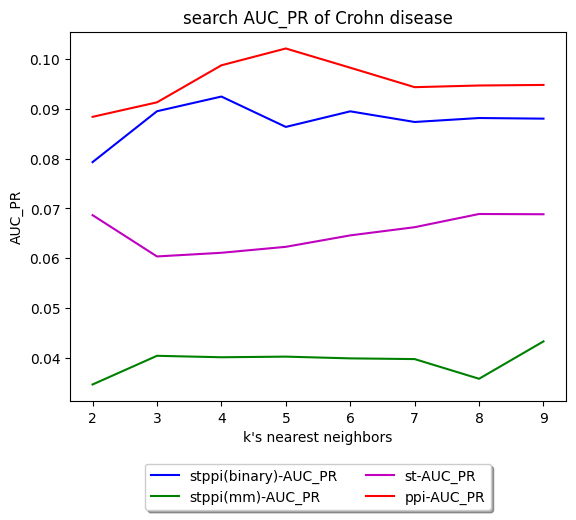

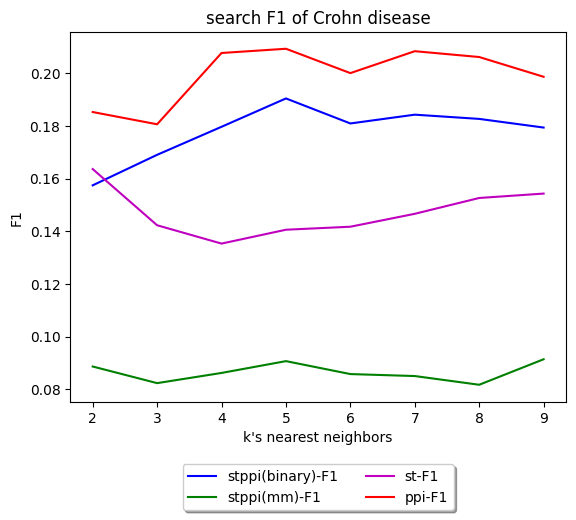

In [35]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
for metric in ['AUC_PR','F1']:
    x = [2,3,4,5,6,7,8,9]
    plt.plot(x,df[(df['Dataset']=='st_binary')& (df['D'] == 6)][metric], label = "stppi(binary)-"+metric, color='blue') 
    plt.plot(x,df[(df['Dataset']=='stppi')& (df['D'] == 4)][metric], label = "stppi(mm)-"+metric, color='g')
    plt.plot(x,df[(df['Dataset']=='st')& (df['D'] == 6)][metric], label = "st-"+metric, color='m') 
    plt.plot(x,df[(df['Dataset']=='ppi')& (df['D'] == 6)][metric], label = "ppi-"+metric, color='r') 
     

    # Show the plots
    plt.xlabel('k\'s nearest neighbors')
    plt.ylabel(metric)
    plt.title('search '+metric+' of ' + foldername)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
    plt.show()

In [ ]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [2,3,4,5,6,7,8,9]
plt.plot(x,df[(df['Dataset']=='st_binary')& (df['D'] == 5)]['F1'], label = "stb-F1", color='m') 
plt.plot(x,df[(df['Dataset']=='st')& (df['D'] == 6)]['F1'], label = "st-F1", color='blue') 
plt.plot(x,df[(df['Dataset']=='ppi')& (df['D'] == 4)]['F1'], label = "ppi-F1", color='r') 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('F1')
plt.title('search F1 of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [3]:
import os
import re
import pandas as pd

# Specify the folder containing the text files
folder_path = 'D:/study/thesis/project/HBDM-main/ppi_results/test_results/'+foldername

# Initialize lists to store extracted data
all_data = []

# Define the pattern to match the required data in the filenames
filename_pattern = r'Dataset-(\w+)--RE-(\w+)--W-(\w+)--Epochs-(\d+)--D-(\d+)'

# Define the pattern to match the required data within the files
data_pattern = r"k=(\d+), leaf_size=(\d+)\s+Random Precision: (\d+\.\d+)\s+Random Coverage: (\d+\.\d+)\s+k=(\d+), leaf_size=(\d+)\s+Average Precision: (\d+\.\d+)\s+Average Coverage: (\d+\.\d+)"

# Loop through all text files in the folder
for filename in os.listdir(folder_path):
    # break
    if filename.endswith('.txt'):
        # Extract 'RE', 'W', and 'Epochs' from the filename
        match = re.match(filename_pattern, filename)
        if match:
            data_value = match.group(1)
            re_value = match.group(2)
            w_value = match.group(3)
            epochs_value = int(match.group(4))
            d_value = int(match.group(5))
            
            with open(os.path.join(folder_path, filename), 'r') as file:
                text = file.read()
                matches = re.findall(data_pattern, text)
                for match in matches:
                    k = int(match[0])
                    avg_precision = float(match[6])
                    random_precision = float(match[2])
                    avg_coverage = float(match[7])
                    random_coverage = float(match[3])
                    
                    # Append the data to the list along with 'RE', 'W', and 'Epochs'
                    all_data.append((data_value, re_value, w_value, epochs_value,d_value,k, avg_precision, random_precision, avg_coverage, random_coverage))

# Create a DataFrame from the extracted data
columns = ['Dataset','RE', 'W', 'Epochs','D','k', 'Average Precision', 'Random Precision', 'Average Coverage', 'Random Coverage']
df = pd.DataFrame(all_data, columns=columns)



In [4]:
import matplotlib.pyplot as plt

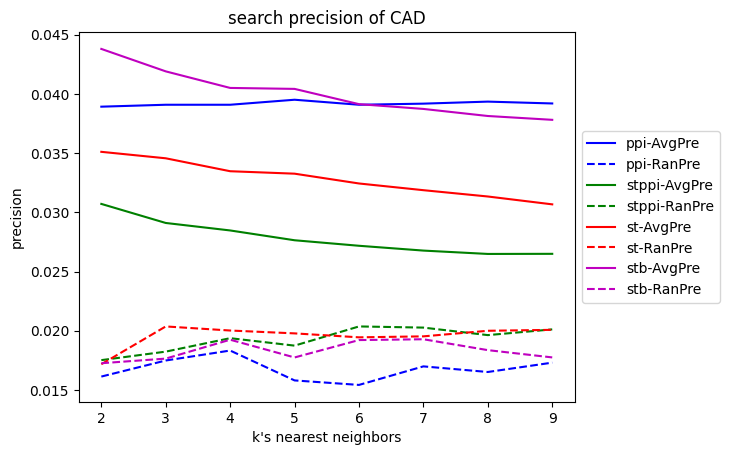

In [6]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [2,3,4,5,6,7,8,9]

plt.plot(x,df[(df['Dataset']=='ppi')][['Average Precision']], label = "ppi-AvgPre", color='blue') 
plt.plot(x,df[(df['Dataset']=='ppi')][['Random Precision']], label = "ppi-RanPre", linestyle="--",  color='blue') 


plt.plot(x,df[(df['Dataset']=='stppi')][['Average Precision']], label = "stppi-AvgPre", color='green') 
plt.plot(x,df[(df['Dataset']=='stppi')][['Random Precision']], label = "stppi-RanPre", linestyle="--",  color='green') 

plt.plot(x,df[(df['Dataset']=='st')][['Average Precision']], label = "st-AvgPre", color='red') 
plt.plot(x,df[(df['Dataset']=='st')][['Random Precision']], label = "st-RanPre", linestyle="--",  color='red') 

plt.plot(x,df[(df['Dataset']=='st_binary')][['Average Precision']], label = "stb-AvgPre", color='m') 
plt.plot(x,df[(df['Dataset']=='st_binary')][['Random Precision']], label = "stb-RanPre", linestyle="--",  color='m') 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('precision')
plt.title('search precision of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

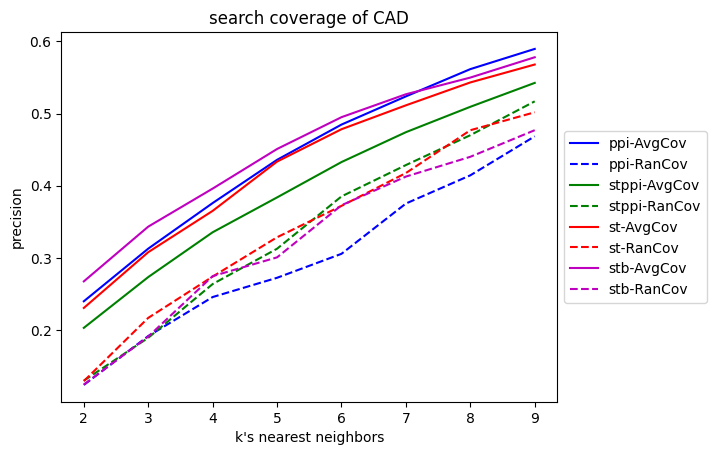

In [7]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [2,3,4,5,6,7,8,9]

plt.plot(x,df[(df['Dataset']=='ppi')][['Average Coverage']], label = "ppi-AvgCov", color='blue') 
plt.plot(x,df[(df['Dataset']=='ppi')][['Random Coverage']], label = "ppi-RanCov", linestyle="--",  color='blue') 


plt.plot(x,df[(df['Dataset']=='stppi')][['Average Coverage']], label = "stppi-AvgCov", color='green') 
plt.plot(x,df[(df['Dataset']=='stppi')][['Random Coverage']], label = "stppi-RanCov", linestyle="--",  color='green') 

plt.plot(x,df[(df['Dataset']=='st')][['Average Coverage']], label = "st-AvgCov", color='red') 
plt.plot(x,df[(df['Dataset']=='st')][['Random Coverage']], label = "st-RanCov", linestyle="--",  color='red') 

plt.plot(x,df[(df['Dataset']=='st_binary')][['Average Coverage']], label = "stb-AvgCov", color='m') 
plt.plot(x,df[(df['Dataset']=='st_binary')][['Random Coverage']], label = "stb-RanCov", linestyle="--",  color='m') 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('precision')
plt.title('search coverage of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

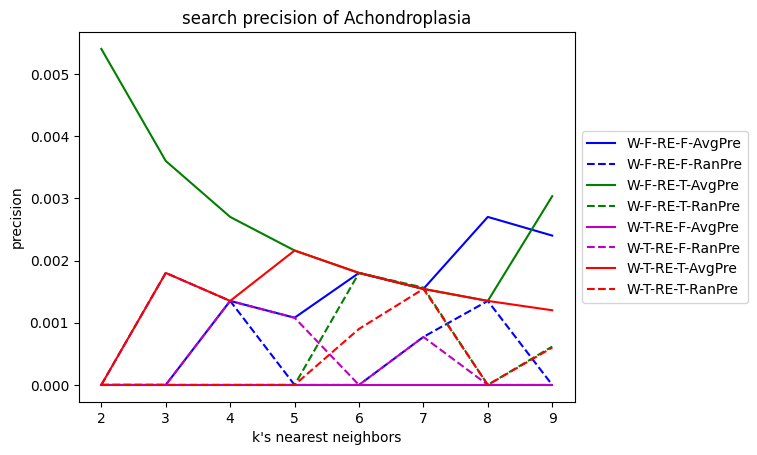

In [5]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [2,3,4,5,6,7,8,9]

plt.plot(x,df[(df['W']=='False')&(df['RE']=='False')][['Average Precision']], label = "W-F-RE-F-AvgPre", color='blue') 
plt.plot(x,df[(df['W']=='False')&(df['RE']=='False')][['Random Precision']], label = "W-F-RE-F-RanPre", linestyle="--",  color='blue') 


plt.plot(x,df[(df['W']=='False')&(df['RE']=='True')][['Average Precision']], label = "W-F-RE-T-AvgPre", color='green') 
plt.plot(x,df[(df['W']=='False')&(df['RE']=='True')][['Random Precision']], label = "W-F-RE-T-RanPre", linestyle="--",  color='green') 

plt.plot(x,df[(df['W']=='True')&(df['RE']=='False')][['Average Precision']], label = "W-T-RE-F-AvgPre", color='m') 
plt.plot(x,df[(df['W']=='True')&(df['RE']=='False')][['Random Precision']], label = "W-T-RE-F-RanPre", linestyle="--",  color='m') 

plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==2)][['Average Precision']], label = "W-T-RE-T-AvgPre", color='r') 
plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==2)][['Random Precision']], label = "W-T-RE-T-RanPre", linestyle="--",  color='r') 


# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('precision')
plt.title('search precision of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

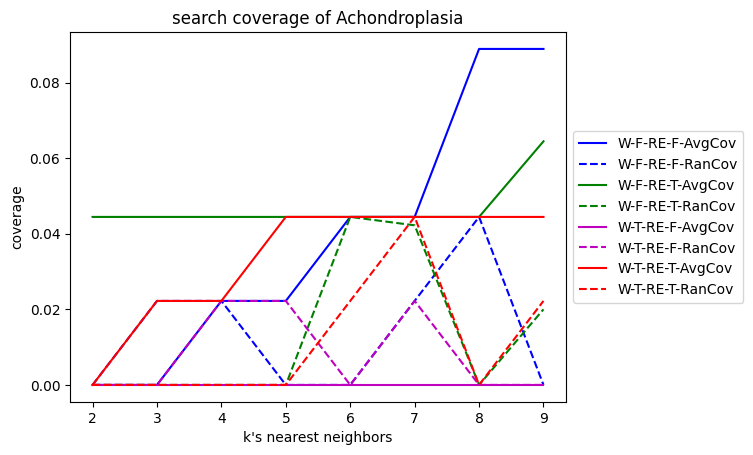

In [6]:

# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [2,3,4,5,6,7,8,9]

plt.plot(x,df[(df['W']=='False')&(df['RE']=='False')][['Average Coverage']], label = "W-F-RE-F-AvgCov", color='blue') 
plt.plot(x,df[(df['W']=='False')&(df['RE']=='False')][['Random Coverage']], label = "W-F-RE-F-RanCov", linestyle="--",  color='blue') 


plt.plot(x,df[(df['W']=='False')&(df['RE']=='True')][['Average Coverage']], label = "W-F-RE-T-AvgCov", color='green') 
plt.plot(x,df[(df['W']=='False')&(df['RE']=='True')][['Random Coverage']], label = "W-F-RE-T-RanCov", linestyle="--",  color='green') 

plt.plot(x,df[(df['W']=='True')&(df['RE']=='False')][['Average Coverage']], label = "W-T-RE-F-AvgCov", color='m') 
plt.plot(x,df[(df['W']=='True')&(df['RE']=='False')][['Random Coverage']], label = "W-T-RE-F-RanCov", linestyle="--",  color='m') 

plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==2)][['Average Coverage']], label = "W-T-RE-T-AvgCov", color='r') 
plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==2)][['Random Coverage']], label = "W-T-RE-T-RanCov", linestyle="--",  color='r') 


# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('coverage')
plt.title('search coverage of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (8,) and (0, 1)

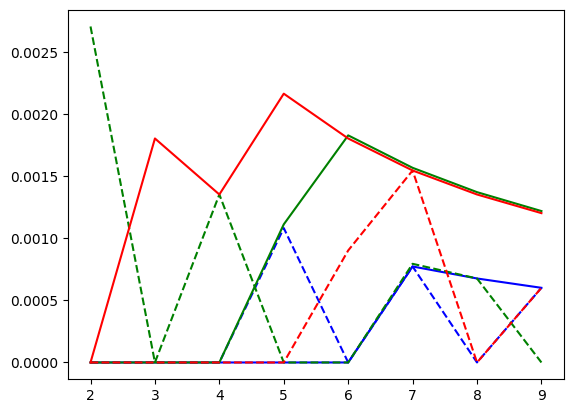

In [7]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [2,3,4,5,6,7,8,9]

colors = ['b','g','r','m']
epoch_list = [7000,10000,15000,20000]
for i, epoch in enumerate(epoch_list):
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==epoch)&(df['D']==2)][['Average Precision']], label = str(epoch)+"-AvgPre", color=colors[i]) 
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==epoch)&(df['D']==2)][['Random Precision']], label = str(epoch)+"-RanPre", linestyle="--",  color=colors[i]) 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('precision')
plt.title('search precision of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

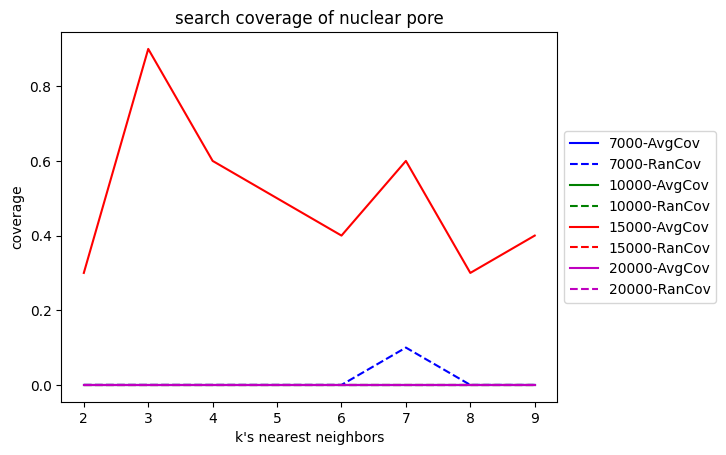

In [ ]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [2,3,4,5,6,7,8,9]

colors = ['b','g','r','m']
epoch_list = [7000,10000,15000,20000]
for i, epoch in enumerate(epoch_list):
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==epoch)&(df['D']==2)][['Average Coverage']], label = str(epoch)+"-AvgCov", color=colors[i]) 
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==epoch)&(df['D']==2)][['Random Coverage']], label = str(epoch)+"-RanCov", linestyle="--",  color=colors[i]) 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('coverage')
plt.title('search coverage of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

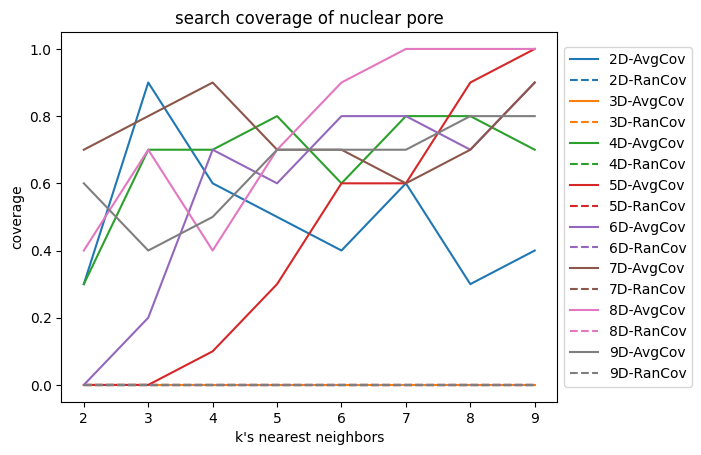

In [ ]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [2,3,4,5,6,7,8,9]

colors = list(mcolors.TABLEAU_COLORS.values())
d_list = [2,3,4,5,6,7,8,9]
for i, dim in enumerate(d_list):
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==dim)][['Average Coverage']], label = str(dim)+"D-AvgCov", color=colors[i]) 
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==dim)][['Random Coverage']], label = str(dim)+"D-RanCov", linestyle="--",  color=colors[i]) 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('coverage')
plt.title('search coverage of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

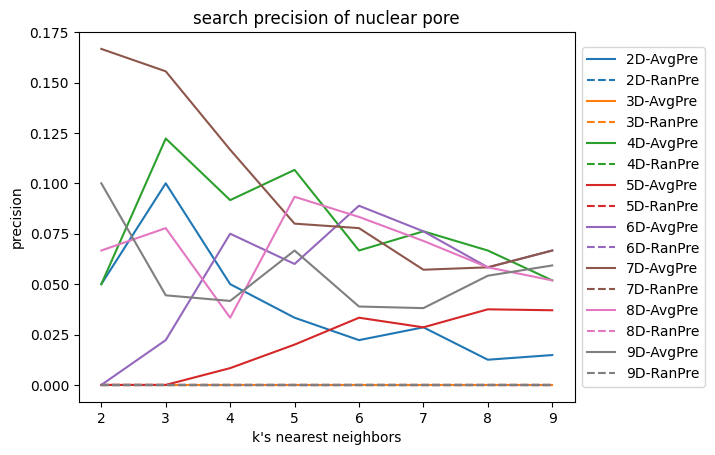

In [ ]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [2,3,4,5,6,7,8,9]

colors = list(mcolors.TABLEAU_COLORS.values())
d_list = [2,3,4,5,6,7,8,9]
for i, dim in enumerate(d_list):
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==dim)][['Average Precision']], label = str(dim)+"D-AvgPre", color=colors[i]) 
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==dim)][['Random Precision']], label = str(dim)+"D-RanPre", linestyle="--",  color=colors[i]) 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('precision')
plt.title('search precision of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

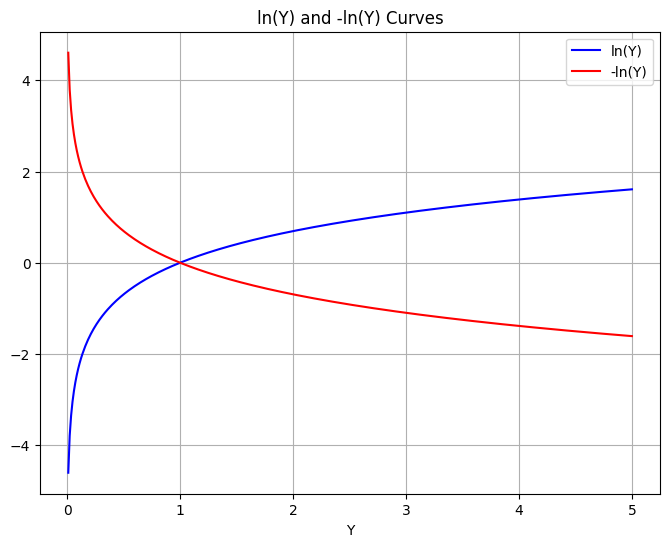

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0.01, 5, 400)  # Avoid x=0 for ln curve

# Calculate ln and -ln values
ln_y = np.log(x)
neg_ln_y = -np.log(x)

# Create a figure and axis
plt.figure(figsize=(8, 6))
plt.title("ln(Y) and -ln(Y) Curves")
#plt.title("-ln(Y) Curve")

# Plot ln curve in blue
plt.plot(x, ln_y, label="ln(Y)", color="blue")

# Plot -ln curve in red
plt.plot(x, neg_ln_y, label="-ln(Y)", color="red")

# Add labels and legend
plt.xlabel("Y")
plt.ylabel("")
plt.legend()

# Show the plot
plt.grid()
plt.show()


In [ ]:
with open(r'D:\study\thesis\project\HBDM-main\datasets\ppi\ppi_index.pkl', 'rb') as file:
    id2index = pickle.load(file)
with open(r'D:\study\thesis\project\HBDM-main\datasets\ppi\ppi_aliases2stringId.pkl', 'rb') as file:
    aliases2stringId = pickle.load(file)
with open(r'D:\study\thesis\project\HBDM-main\datasets\ppi\ppi_name2stringId.pkl', 'rb') as file:
    name2stringId = pickle.load(file)

In [ ]:
def convert_stringId(alias):
    try:
        stringId = name2stringId[alias]
    except:
        #print(alias, 'can\'t be converted by name2stringId! Now trying aliases2stringId.')
        try:
            stringId = aliases2stringId[alias]
        except:
            #print(alias, 'can\'t be converted by aliases2stringId! Now return None.')
            stringId = None
    #print(alias, stringId)
    return stringId

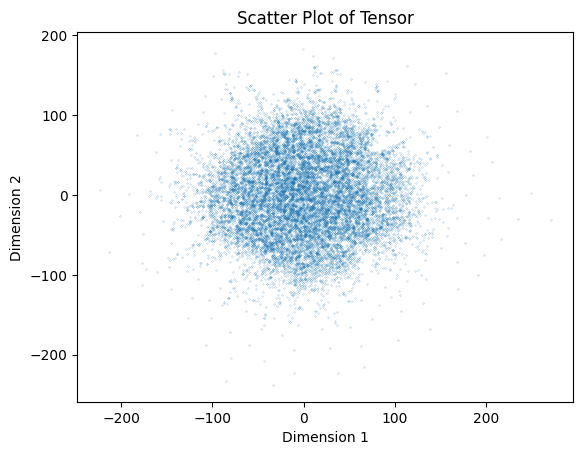

In [ ]:
file_path_2d = r'D:\study\thesis\project\HBDM-main\ppi_results\w_2d_latent_representations.pkl'

# Open and load the pickle file
with open(file_path_2d, 'rb') as file:
    loaded_tensor = pickle.load(file)
# Generate some random data as a placeholder
tensor = loaded_tensor.cpu()

# Now you can convert it to a NumPy array
data = tensor.detach().numpy()


# Create a scatter plot
plt.scatter(data[:, 0], data[:, 1], s=0.02)

plt.title("Scatter Plot of Tensor")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [ ]:
file_path_2d = '2d_latent_representations.pkl'
goi = ['DDR1','TNFA']

# Open and load the pickle file
with open(file_path_2d, 'rb') as file:
    loaded_tensor = pickle.load(file)
# Generate some random data as a placeholder
tensor = loaded_tensor.cpu()

# Now you can convert it to a NumPy array
data = tensor.detach().numpy()

# highlight dots
highlight_indices = []
for gene in goi:
    stringid = convert_stringId(gene)
    if stringid is not None:
        highlight_indices.append(id2index[int(stringid.split('.')[-1][-11:])])
    else:
        highlight_indices.append(None)

# Create a scatter plot
plt.scatter(data[:, 0], data[:, 1])

for index in highlight_indices:
    plt.scatter(data[index, 0], data[index, 1], color='red', marker='o', label=f'Data {index}')
plt.title("Scatter Plot of Tensor")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '2d_latent_representations.pkl'

In [ ]:
file_path = 'latent_representations.pkl'

# Open and load the pickle file
with open(file_path, 'rb') as file:
    loaded_tensor = pickle.load(file)

# Generate some random data as a placeholder
tensor = loaded_tensor.cpu()

# Now you can convert it to a NumPy array
data = tensor.detach().numpy()

In [ ]:
datat = data.T
datat.shape

(2, 20111)

IndexError: index 2 is out of bounds for axis 0 with size 2

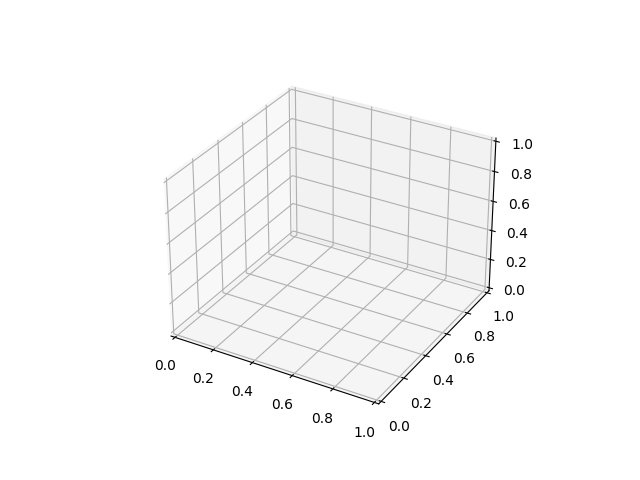

In [ ]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# creating figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# creating the plot
plot_geeks = ax.scatter(datat[0], datat[1], datat[2], color='green')

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()